In [1]:
import os

log_dir = 'smart_village_interface/intervillage/ems/tensorboard'
for root, dirs, files in os.walk(log_dir):
    for file in files:
        if file.startswith("events.out.tfevents"):
            print(f"Found TensorBoard log file: {os.path.join(root, file)}")


Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day10_0\events.out.tfevents.1717167627.vub-dynamic-loads.267917.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day11_0\events.out.tfevents.1717513219.vub-dynamic-loads.932044.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day12_0\events.out.tfevents.1718204419.vub-dynamic-loads.2265439.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day1_0\events.out.tfevents.1713020421.vub-dynamic-loads.2659717.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day2_0\events.out.tfevents.1714057218.vub-dynamic-loads.951272.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorboard\house1\day3_0\events.out.tfevents.1714230018.vub-dynamic-loads.1255888.0
Found TensorBoard log file: smart_village_interface/intervillage/ems/tensorb

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


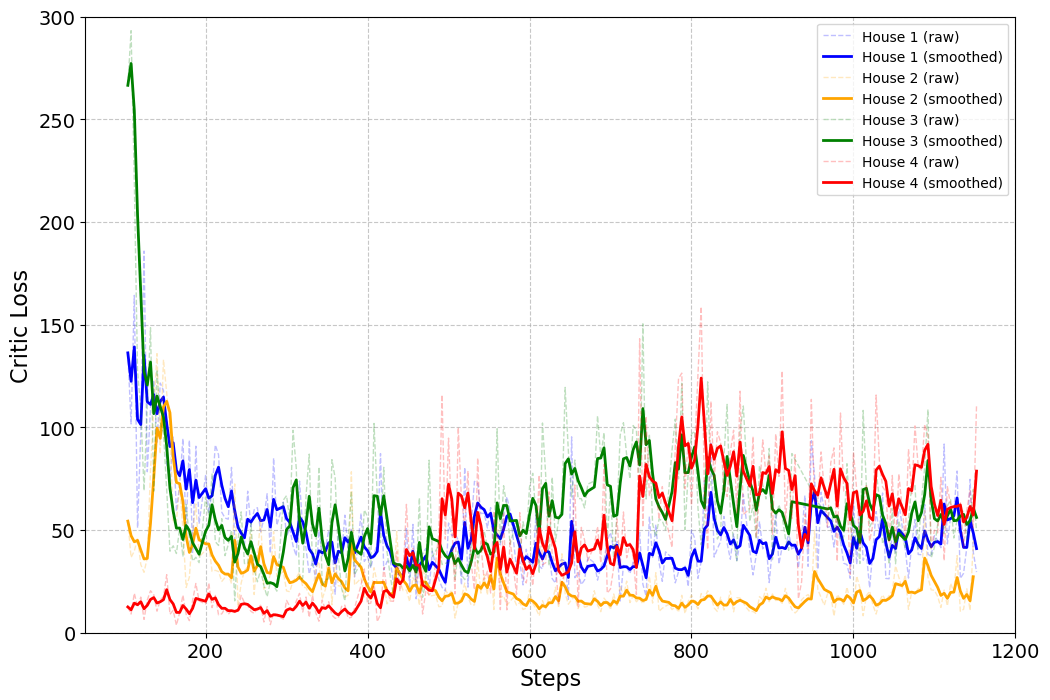

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def extract_tensorboard_data(log_dir, tag):
    data = {}

    # Walk through the directory and read all event files
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file.startswith("events.out.tfevents"):
                file_path = os.path.join(root, file)
                file_path = file_path.replace("\\", "/")  # Ensure correct path format

                # Identify the house from the directory structure
                house = file_path.split("/")[-3]  # Adjusted to -2 to capture house directory
                if house not in data:
                    data[house] = {'steps': [], 'values': []}

                for event in tf.compat.v1.train.summary_iterator(file_path):
                    for value in event.summary.value:
                        if value.tag == tag:
                            data[house]['steps'].append(event.step)
                            data[house]['values'].append(value.simple_value)

    # Sort the data by step for each house
    for house in data:
        sorted_indices = np.argsort(data[house]['steps'])
        data[house]['steps'] = np.array(data[house]['steps'])[sorted_indices]
        data[house]['values'] = np.array(data[house]['values'])[sorted_indices]

    return data

def smooth(values, weight=0.6):
    smoothed_values = []
    last = values[0]
    for value in values:
        smoothed_value = last * weight + (1 - weight) * value
        smoothed_values.append(smoothed_value)
        last = smoothed_value
    return smoothed_values

# Replace 'path/to/logs' with your TensorBoard log directory
log_dir = 'smart_village_interface/intervillage/ems/tensorboard'
tag = 'train/critic_loss'  # Replace with your metric's tag name

data = extract_tensorboard_data(log_dir, tag)

# Define a list of colors
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plotting
plt.figure(figsize=(12, 8))

for idx, (house, values) in enumerate(data.items()):
    color = color_list[idx % len(color_list)]
    smoothed_values = smooth(values['values'])
    
    # Extract house number for label
    house_number = house.split("house")[-1]
    if house_number == '5':
        house_number = '4'
    
    
    # Plot unsmoothed data with high transparency
    plt.plot(values['steps'], values['values'], label=f'House {house_number} (raw)', color=color, alpha=0.25, linestyle='dashed', linewidth=1)
    
    # Plot smoothed data
    plt.plot(values['steps'], smoothed_values, label=f'House {house_number} (smoothed)', color=color, linewidth=2)

plt.xlabel('Steps', fontsize=16)
plt.ylabel('Critic Loss', fontsize=16)
#plt.title('Training Progress by House: Critic Loss', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(right=1200)
plt.ylim(0, 300)

# Adjust legend
plt.legend()
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, frameon=False)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('loss_critic.pdf', bbox_inches='tight')

plt.show()


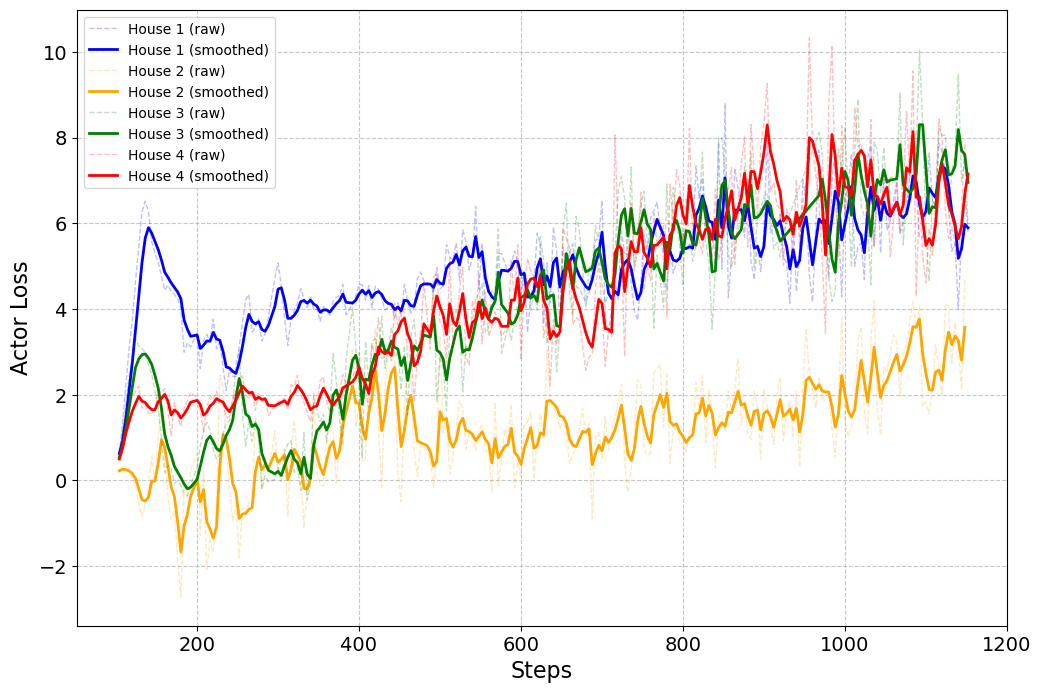

In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def extract_tensorboard_data(log_dir, tag):
    data = {}

    # Walk through the directory and read all event files
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file.startswith("events.out.tfevents"):
                file_path = os.path.join(root, file)
                file_path = file_path.replace("\\", "/")  # Ensure correct path format

                # Identify the house from the directory structure
                house = file_path.split("/")[-3]  # Adjusted to -2 to capture house directory
                if house not in data:
                    data[house] = {'steps': [], 'values': []}

                for event in tf.compat.v1.train.summary_iterator(file_path):
                    for value in event.summary.value:
                        if value.tag == tag:
                            data[house]['steps'].append(event.step)
                            data[house]['values'].append(value.simple_value)

    # Sort the data by step for each house
    for house in data:
        sorted_indices = np.argsort(data[house]['steps'])
        data[house]['steps'] = np.array(data[house]['steps'])[sorted_indices]
        data[house]['values'] = np.array(data[house]['values'])[sorted_indices]

    return data

def smooth(values, weight=0.6):
    smoothed_values = []
    last = values[0]
    for value in values:
        smoothed_value = last * weight + (1 - weight) * value
        smoothed_values.append(smoothed_value)
        last = smoothed_value
    return smoothed_values

# Replace 'path/to/logs' with your TensorBoard log directory
log_dir = 'smart_village_interface/intervillage/ems/tensorboard'
tag = 'train/actor_loss'  # Replace with your metric's tag name

data = extract_tensorboard_data(log_dir, tag)

# Define a list of colors
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plotting
plt.figure(figsize=(12, 8))

for idx, (house, values) in enumerate(data.items()):
    color = color_list[idx % len(color_list)]
    smoothed_values = smooth(values['values'])
    
    # Extract house number for label
    house_number = house.split("house")[-1]
    if house_number == '5':
        house_number = '4'
    
    # Plot unsmoothed data with high transparency
    plt.plot(values['steps'], values['values'], label=f'House {house_number} (raw)', color=color, alpha=0.25, linestyle='dashed', linewidth=1)
    
    # Plot smoothed data
    plt.plot(values['steps'], smoothed_values, label=f'House {house_number} (smoothed)', color=color, linewidth=2)

plt.xlabel('Steps', fontsize=16)
plt.ylabel('Actor Loss', fontsize=16)
#plt.title('Training Progress by House: Actor Loss', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(right=1200)

# Adjust legend
plt.legend()
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, frameon=False)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('loss_actor.pdf', bbox_inches='tight')

plt.show()

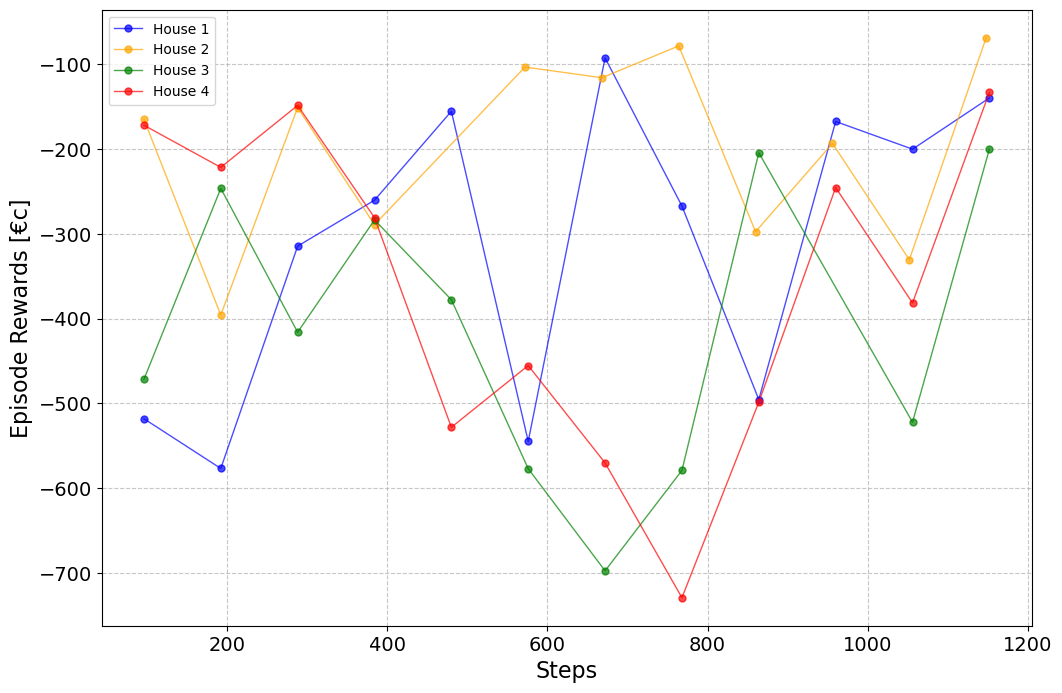

In [4]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def extract_tensorboard_data(log_dir, tag):
    data = {}

    # Walk through the directory and read all event files
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if file.startswith("events.out.tfevents"):
                file_path = os.path.join(root, file)
                file_path = file_path.replace("\\", "/")  # Ensure correct path format

                # Identify the house from the directory structure
                house = file_path.split("/")[-3]  # Adjusted to -2 to capture house directory
                if house not in data:
                    data[house] = {'steps': [], 'values': []}

                for event in tf.compat.v1.train.summary_iterator(file_path):
                    for value in event.summary.value:
                        if value.tag == tag:
                            data[house]['steps'].append(event.step)
                            data[house]['values'].append(value.simple_value)

    # Sort the data by step for each house
    for house in data:
        sorted_indices = np.argsort(data[house]['steps'])
        data[house]['steps'] = np.array(data[house]['steps'])[sorted_indices]
        data[house]['values'] = np.array(data[house]['values'])[sorted_indices]

    return data

def smooth(values, weight=0.6):
    smoothed_values = []
    last = values[0]
    for value in values:
        smoothed_value = last * weight + (1 - weight) * value
        smoothed_values.append(smoothed_value)
        last = smoothed_value
    return smoothed_values

# Replace 'path/to/logs' with your TensorBoard log directory
log_dir = 'smart_village_interface/intervillage/ems/tensorboard'
tag = 'rollout/ep_rew_mean'  # Replace with your metric's tag name

data = extract_tensorboard_data(log_dir, tag)

# Define a list of colors
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plotting
plt.figure(figsize=(12, 8))

for idx, (house, values) in enumerate(data.items()):
    color = color_list[idx % len(color_list)]
    
    # Extract house number for label
    house_number = house.split("house")[-1]
    if house_number == '5':
        house_number = '4'
    
    # Plot unsmoothed data as dots with lines connecting them
    plt.plot(values['steps'], values['values'], label=f'House {house_number}', color=color, marker='o', markersize=5, linestyle='-', linewidth=1, alpha=0.7)
    
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Episode Rewards [€c]', fontsize=16)
#plt.title('Training Progress by House: Episode Rewards', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legend
plt.legend()
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, frameon=False)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('episode_rewards.pdf', bbox_inches='tight')

plt.show()